
# WalmartStoresales.


#### In this Project we will perform Exploratory data analysis, data visualizations and Modling of the WalmartStoresales.For EDA,we  using Python programming language, for data visualization,we using Matplotlib and Seaborn and for data modling, we  using sketlearn.





# Dataset Description :

#### This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file WalmartStoresales. Within this file you will find the following fields:

#### Store - the store number

#### Date - the week of sales

#### Weekly_Sales - sales for the given store

#### Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

#### Temperature - Temperature on the day of sale

#### Fuel_Price - Cost of fuel in the region

#### CPI – Prevailing consumer price index

#### Unemployment - Prevailing unemployment rate


# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# load data

In [3]:
df = pd.read_csv('Walmart_Store_sales.csv')

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# EDA

In [5]:
#display information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# detect how many rows and columns
df.shape

(6435, 8)

In [7]:
# checking for any missing or null values
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
# descriptive column (Holiday Flag) by add new column (IF it is Holiday) contains Yes and no
df['IF it is Holiday'] = df['Holiday_Flag'].apply(lambda x: 'Yes' if x == 1 else 'NO')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,IF it is Holiday
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,NO
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Yes
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,NO
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,NO
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,NO


In [9]:
#descriptive statistics of the dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [10]:
#rename the columns
df.columns = df.columns.str.replace(' ','_')

In [10]:
#display columns
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IF_it_is_Holiday'],
      dtype='object')

In [11]:
#Show the max value in weekly sales for any date
df[df['Weekly_Sales'] == max(df['Weekly_Sales'])]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,IF_it_is_Holiday
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724,NO


In [11]:
#Show the min value in weekly sales for any date
df[df['Weekly_Sales'] == min(df['Weekly_Sales'])]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,IF_it_is_Holiday
4619,33,03-12-2010,209986.25,0,52.82,3.041,126.731333,9.265,NO


In [13]:
## Determining the relevancy of features using correlations
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


<AxesSubplot:>

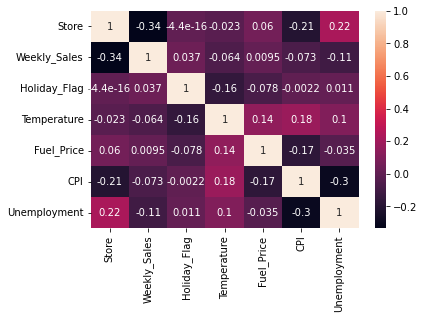

In [112]:
# check correlation by use heatmap
sns.heatmap(df.corr(),annot=True)


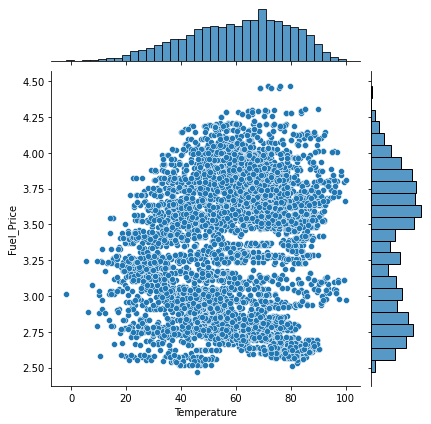

In [206]:
sns.jointplot(data=df, x='Temperature',y='Fuel_Price', kind="scatter")
#positive relationship

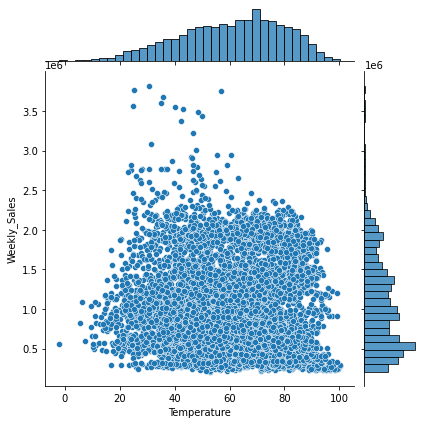

In [158]:
sns.jointplot(data=df, x='Temperature',y='Weekly_Sales', kind="scatter")
#negative relationship

<AxesSubplot:xlabel='Fuel_Price', ylabel='Count'>

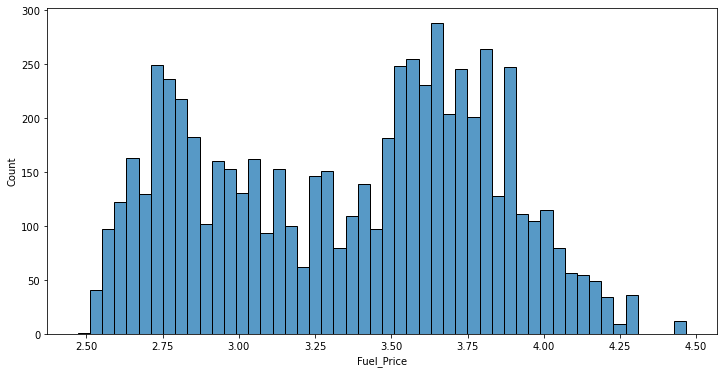

In [247]:
#The Fuel_Price by weekly in histplot 
plt.figure(figsize=(12,6))
sns.histplot(df.Fuel_Price,bins=50)

Text(0, 0.5, 'Store')

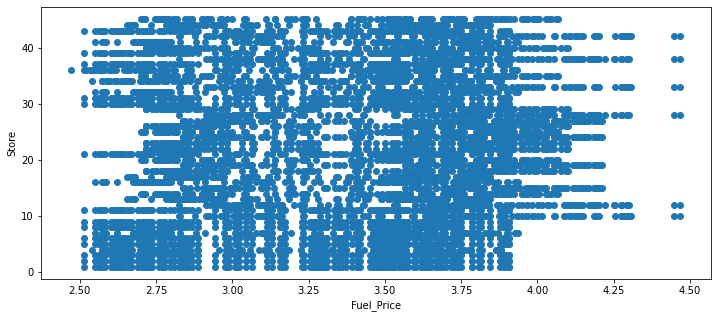

In [249]:
plt.figure(figsize=(12,5))
plt.scatter(x='Fuel_Price',y='Store',data=df)
plt.xlabel('Fuel_Price')
plt.ylabel('Store')
# weak positive relationship

In [20]:
#count how many NO and Yes in IF_it_is_Holiday colume
df.IF_it_is_Holiday.value_counts()

NO     5985
Yes     450
Name: IF_it_is_Holiday, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


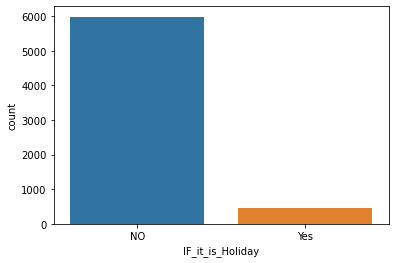

In [21]:
#display the count of (NO and Yes) in IF_it_is_Holiday colume by use countplot
sns.countplot(df.IF_it_is_Holiday);

In [22]:
# what is the sum of Weekly_Sales spend on Holidays
df.groupby('IF_it_is_Holiday')[['Weekly_Sales']].sum()

,Weekly_Sales
IF_it_is_Holiday,
NO,6.231919e+09
Yes,5.052996e+08


In [23]:
## Determining the unique vslue in (Store) colume
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [25]:
#in each store how many the Weekly_Sales
df.groupby('Store')[['Weekly_Sales']].sum()

,Weekly_Sales
Store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07
6,2.237561e+08
7,8.159828e+07
8,1.299512e+08
9,7.778922e+07


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

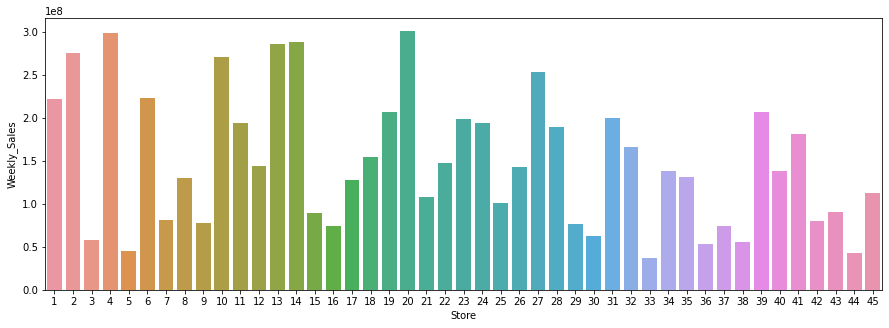

In [218]:
plt.figure(figsize=(15,5))
sns.barplot(x.index,y=x.Weekly_Sales )

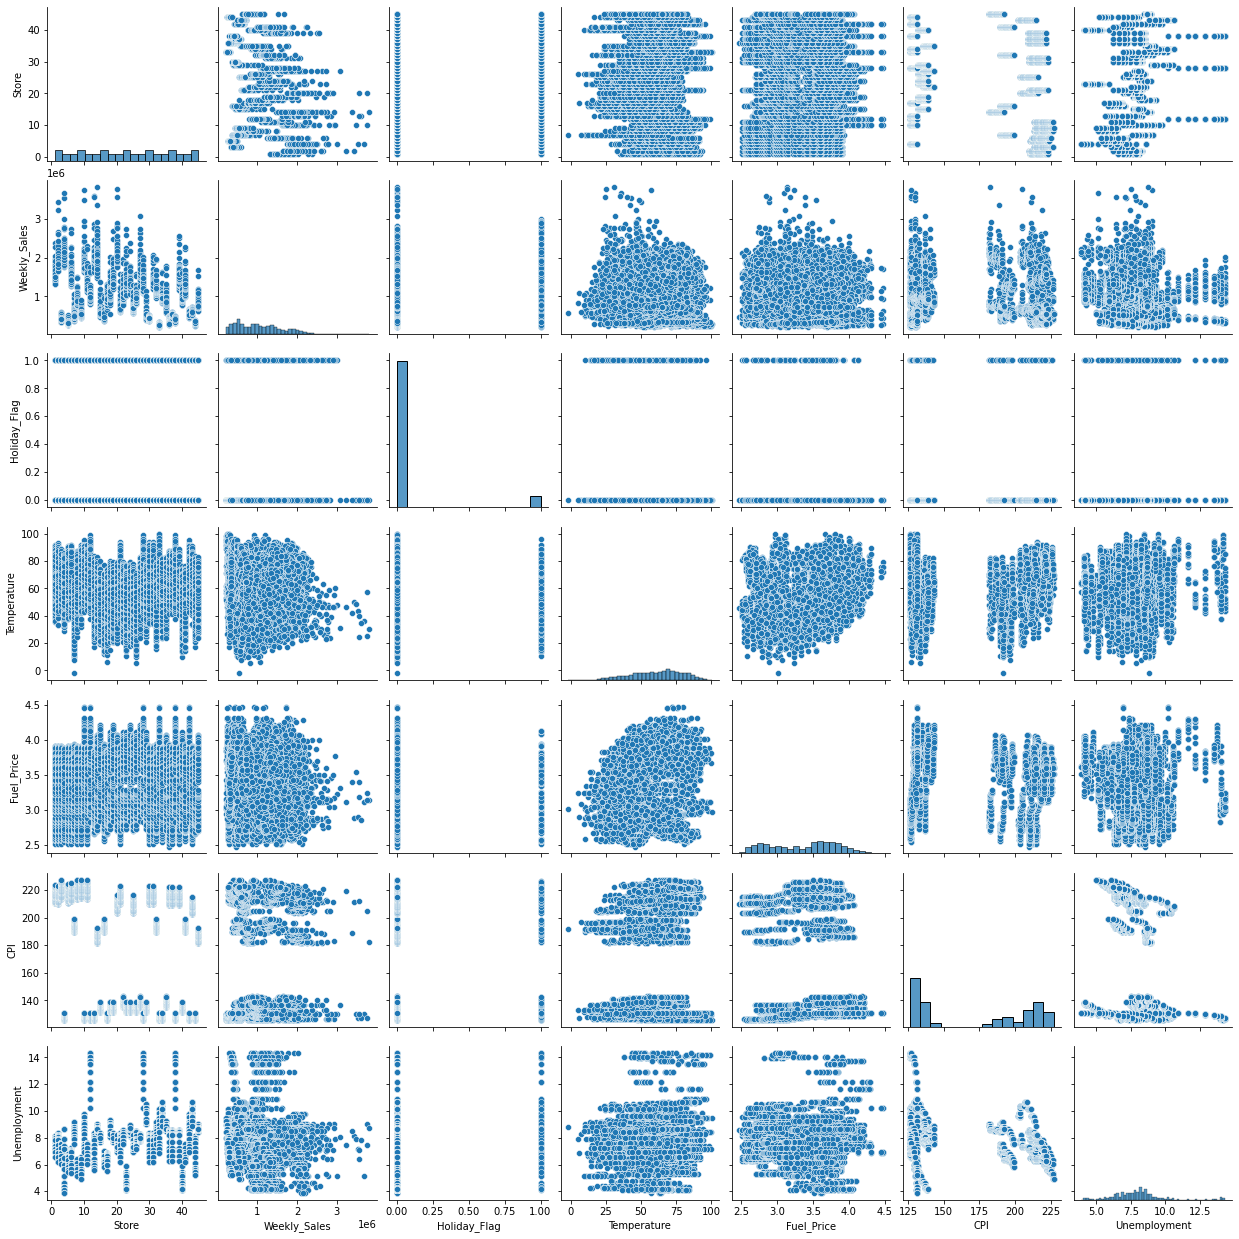

In [29]:
# check correlation by pairplot
sns.pairplot(df)

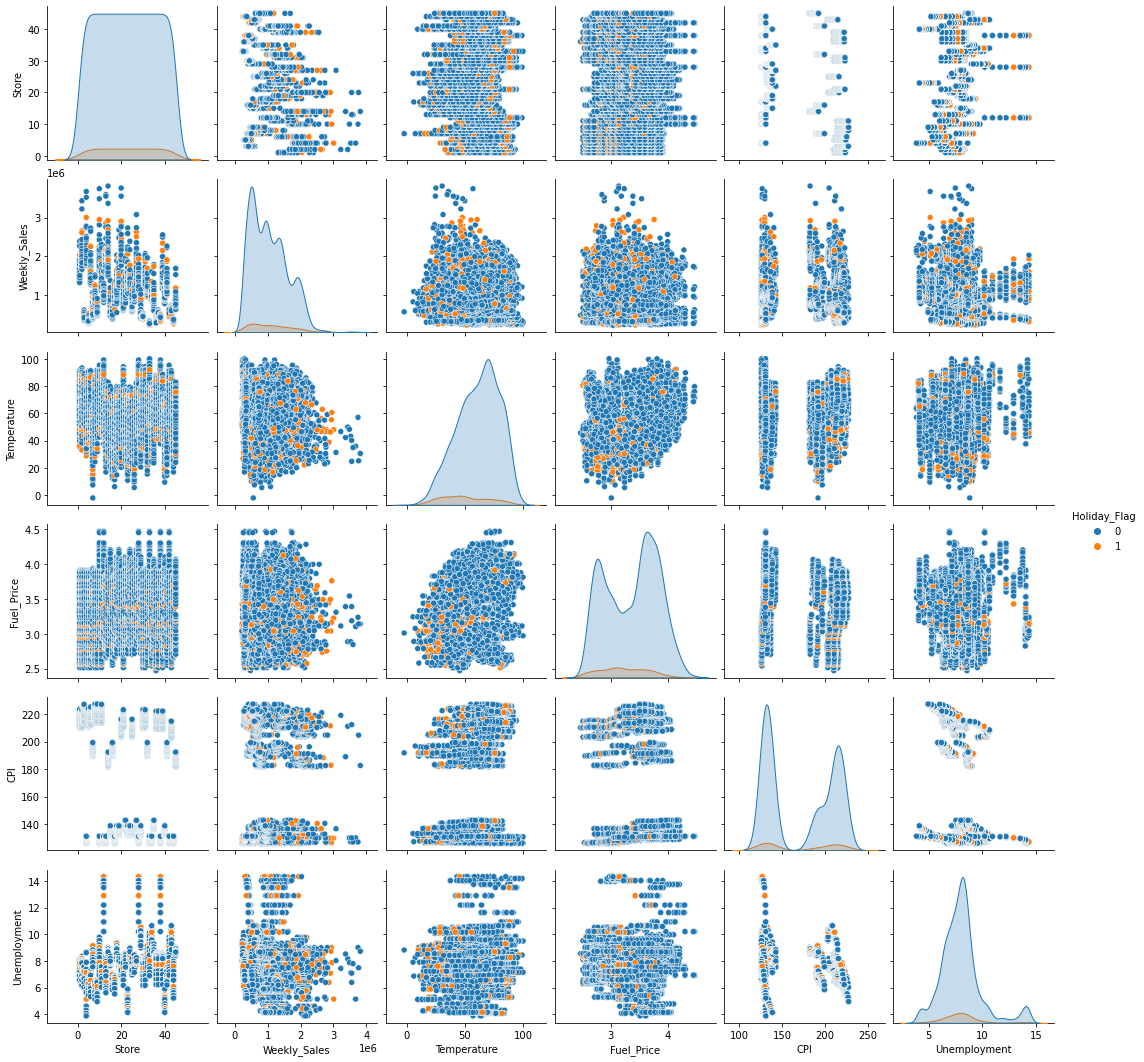

In [30]:
sns.pairplot(df, hue='Holiday_Flag')


# split data into train and test

In [219]:
# take only the useful features of the dataset and split to input and output
## Splitting the dataset into independent and dependent vaiables
X = df[['Temperature','Weekly_Sales','Unemployment','Fuel_Price',]]
y=df['Holiday_Flag']

In [220]:
X.head()

,Temperature,Weekly_Sales,Unemployment,Fuel_Price
0,42.31,1643690.90,8.106,2.572
1,38.51,1641957.44,8.106,2.548
2,39.93,1611968.17,8.106,2.514
3,46.63,1409727.59,8.106,2.561
4,46.50,1554806.68,8.106,2.625


In [221]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IF_it_is_Holiday'],
      dtype='object')

In [222]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Holiday_Flag, dtype: int64

In [223]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [224]:
X_train

,Temperature,Weekly_Sales,Unemployment,Fuel_Price
848,79.03,1501095.49,5.668,3.620
1110,49.59,960115.56,5.825,3.669
5837,52.86,1359770.73,6.547,3.903
400,72.83,420789.74,6.664,3.891
4279,85.55,423351.15,6.565,3.571
...,...,...,...,...
3871,64.95,1268240.66,14.099,3.109
4262,66.97,462909.41,6.891,3.877
2288,23.11,789036.02,6.548,2.666
6292,27.31,890689.51,8.992,2.784


In [225]:
X_test

,Temperature,Weekly_Sales,Unemployment,Fuel_Price
4647,91.11,238172.66,8.687,3.935
1564,86.49,1372872.35,6.334,3.638
1750,68.74,1765584.48,7.795,2.853
6026,88.48,625196.14,9.593,2.653
3338,22.41,1167740.20,8.252,3.367
...,...,...,...,...
2312,69.66,893504.87,6.697,2.797
3006,35.98,899761.48,8.283,2.753
3039,55.23,954401.46,8.572,2.878
1550,78.44,1297335.87,6.664,3.561


# feature scaling

In [226]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [227]:
pd.DataFrame(X_train_scaled,columns=X_train.columns)

,Temperature,Weekly_Sales,Unemployment,Fuel_Price
0,1.001204,0.793392,-1.242618,0.556519
1,-0.601193,-0.162670,-1.158254,0.663097
2,-0.423209,0.543632,-0.770285,1.172062
3,0.663742,-1.115809,-0.707415,1.145961
4,1.356082,-1.111282,-0.760613,0.449941
...,...,...,...,...
5143,0.234840,0.381872,3.287805,-0.554939
5144,0.344787,-1.041372,-0.585436,1.115510
5145,-2.042478,-0.465015,-0.769748,-1.518492
5146,-1.813876,-0.285365,0.543543,-1.261834


# Modeling

# Training the linear regression on the training set

In [228]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [229]:
lr.intercept_

0.06662781662781664

In [230]:
lr.coef_

array([-0.03446227,  0.0067729 ,  0.00699935, -0.01590142])

In [231]:
lr.predict(X_test_scaled)

array([-0.01736508,  0.0063051 ,  0.07694584, ...,  0.09463548,
        0.02440512,  0.0886287 ])

In [232]:
y_test

4647    0
1564    0
1750    0
6026    0
3338    0
       ..
2312    0
3006    0
3039    0
1550    0
5785    0
Name: Holiday_Flag, Length: 1287, dtype: int64

# Model evalution

In [233]:
lr.score(X_train_scaled,y_train)

0.026884720743012402

In [234]:
lr.score(X_test_scaled,y_test)

0.03062765986934024

# We know our model is underfitting because lr.score for training set close to testing set but also close to 0.


# Training the DecisionTree 

In [235]:
from sklearn.tree import DecisionTreeClassifier

In [236]:
dtree = DecisionTreeClassifier()

In [237]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Prediction and Evaluation 

#evaluate our decision tree.

In [238]:
predictions = dtree.predict(X_test)

In [239]:
from sklearn.metrics import classification_report,confusion_matrix

In [240]:
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1180
           1       0.52      0.44      0.47       107

    accuracy                           0.92      1287
   macro avg       0.73      0.70      0.72      1287
weighted avg       0.91      0.92      0.92      1287



In [241]:
print(confusion_matrix(y_test,predictions))

[[1136   44]
 [  60   47]]


### Training the Random Forests

#to compare the decision tree model to a random forest. 

In [242]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)



RandomForestClassifier()

In [243]:
rfc_pred = rfc.predict(X_test)

In [244]:
print(confusion_matrix(y_test,rfc_pred))

[[1177    3]
 [  84   23]]


In [245]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1180
           1       0.88      0.21      0.35       107

    accuracy                           0.93      1287
   macro avg       0.91      0.61      0.66      1287
weighted avg       0.93      0.93      0.91      1287



### We think the Random Forests model is good and better than another module

# Thanks

### by : Amani Aljohani & Malak Alhowaish 